Initial data preview:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.874

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


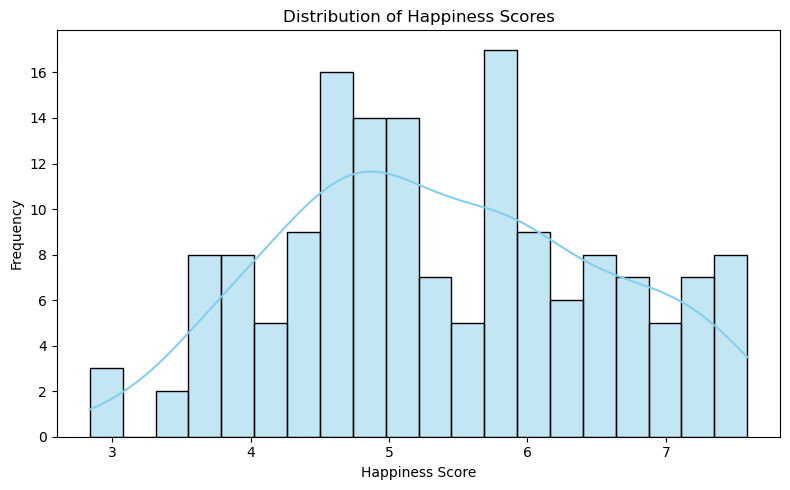

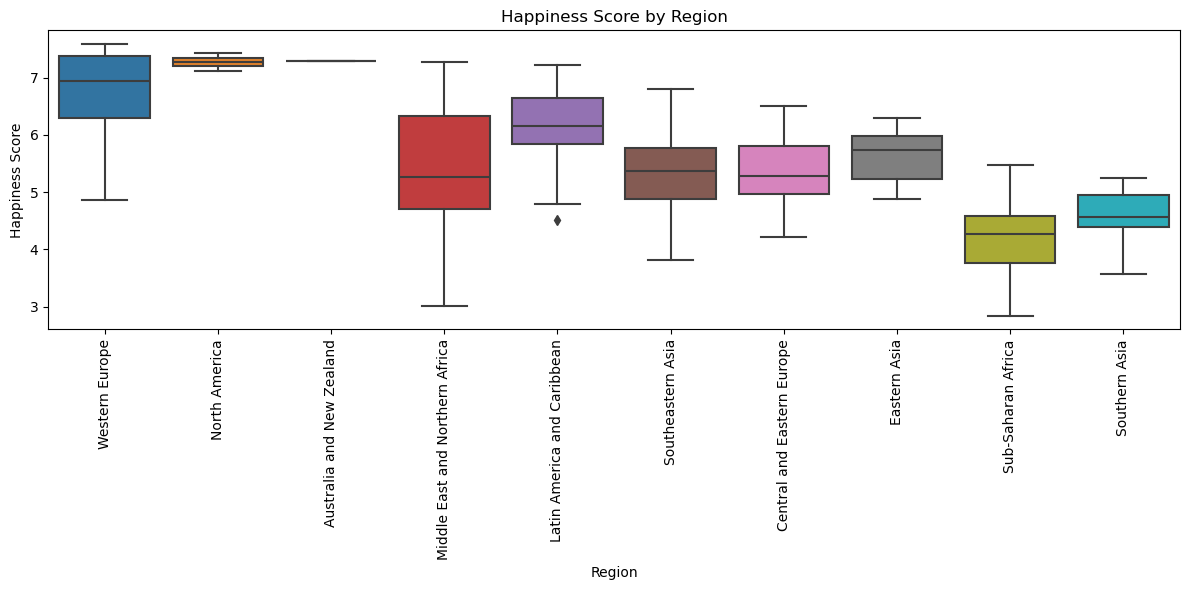

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

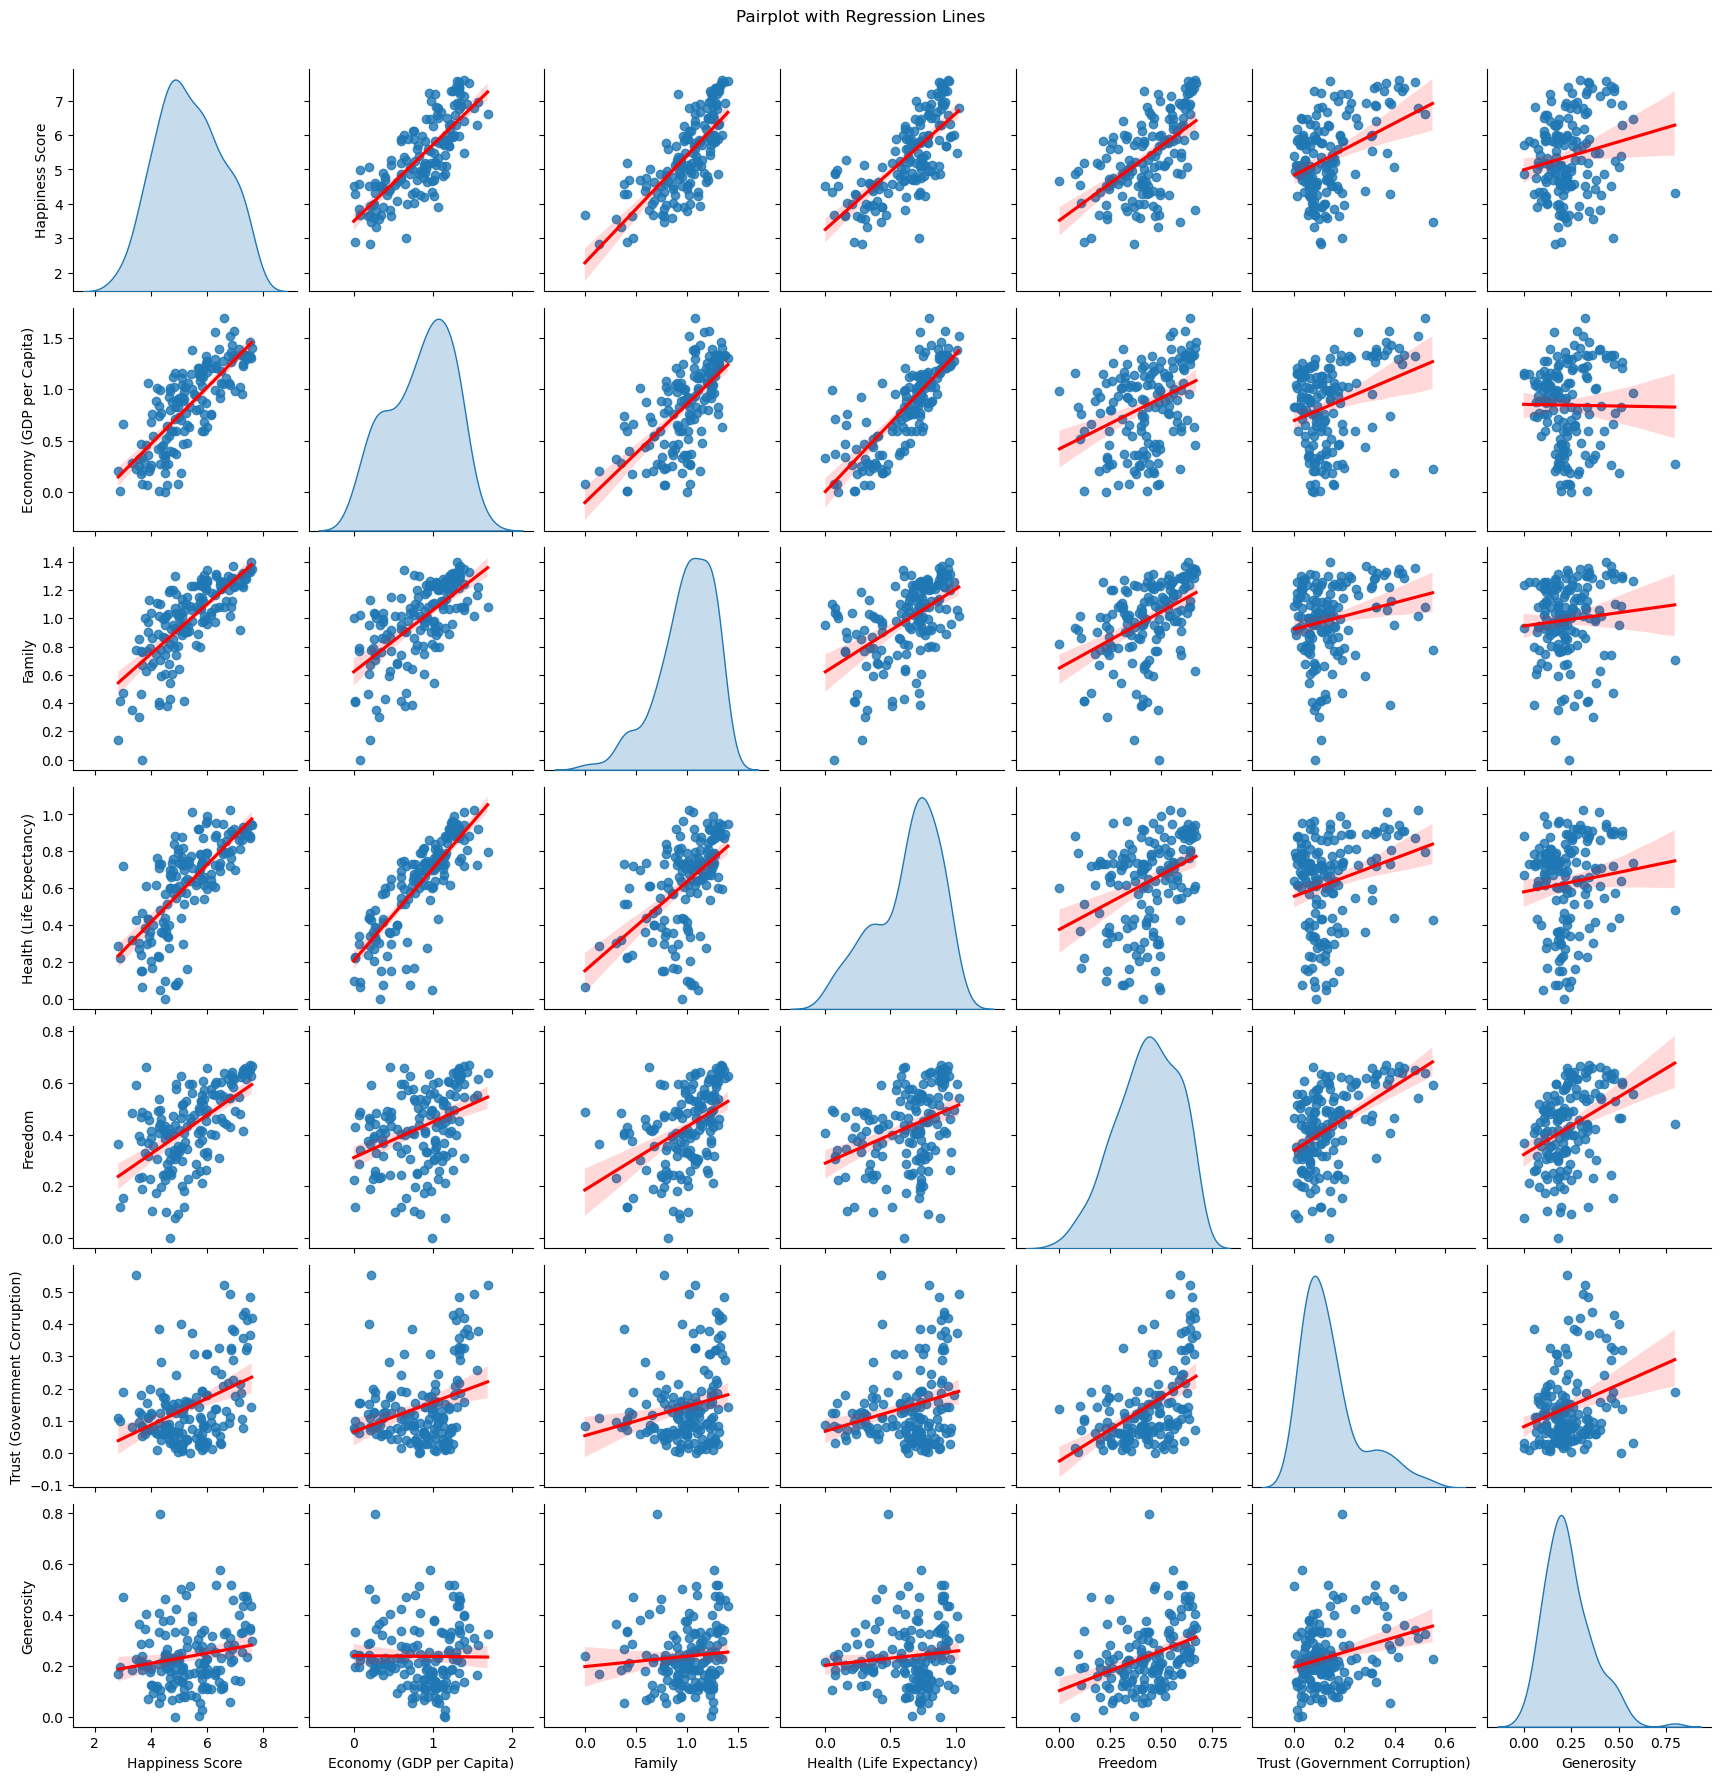

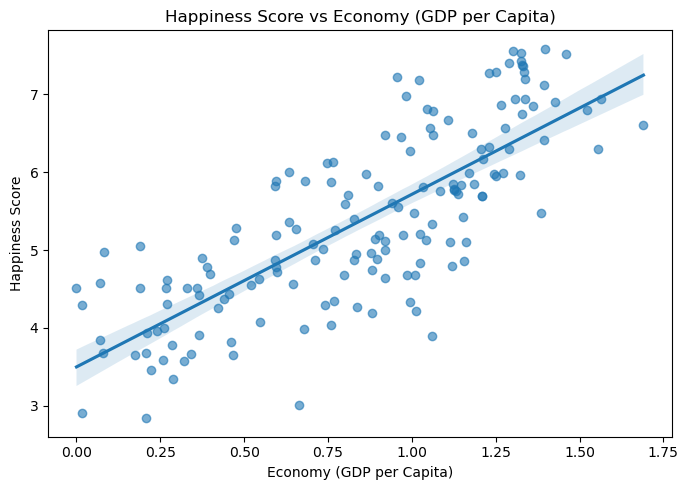

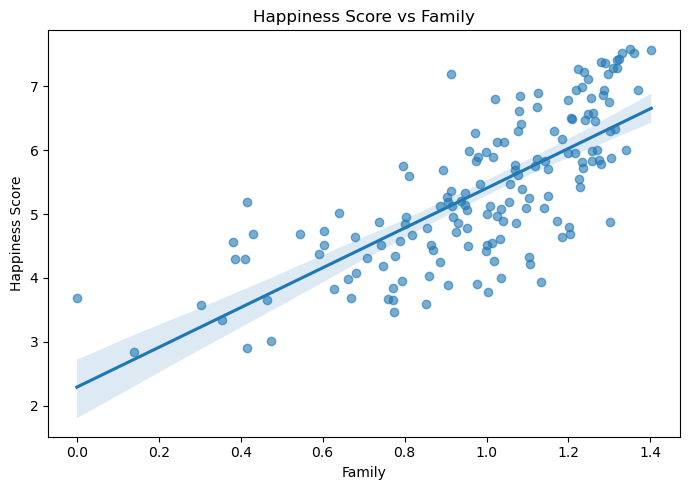

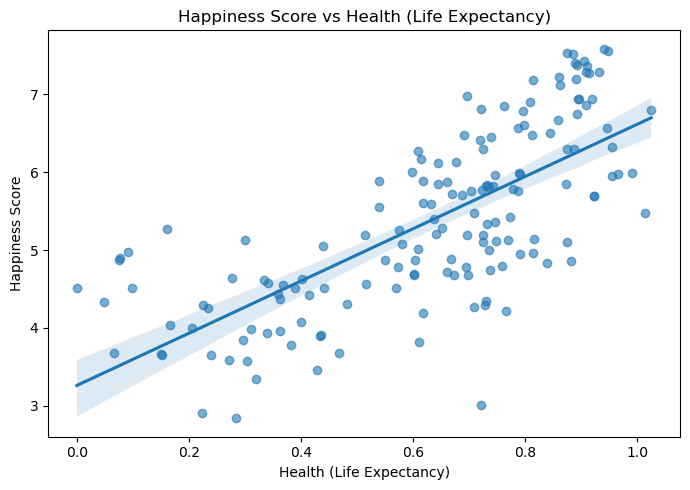

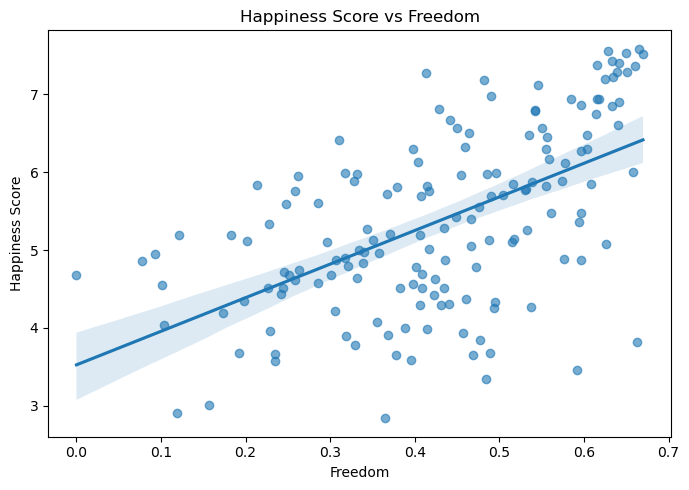

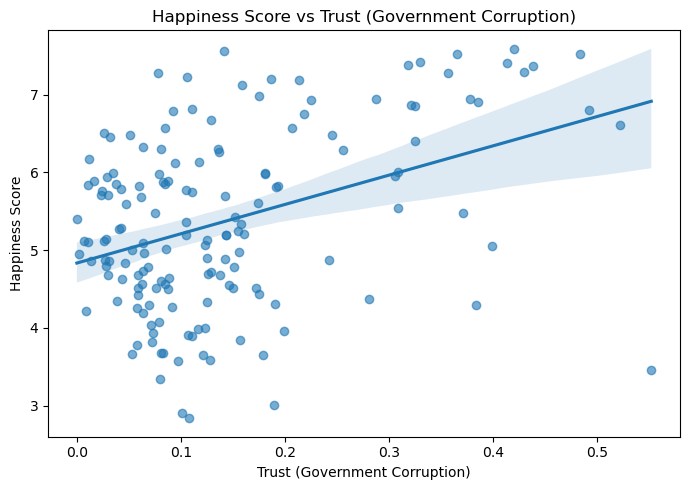

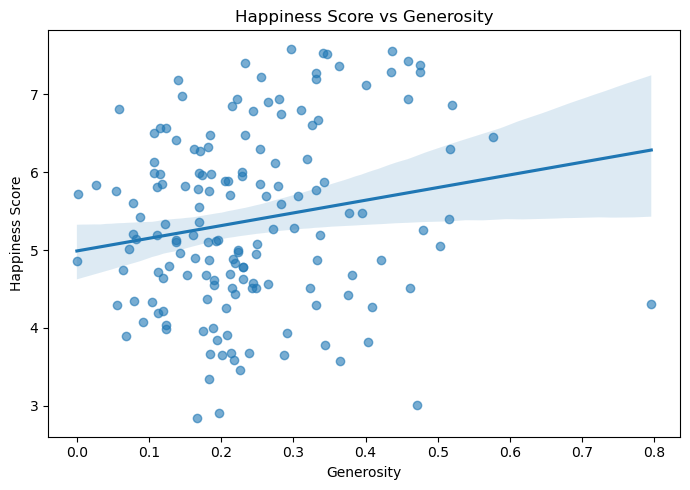

In [30]:
 # Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, zscore
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_excel('datasetBinaguiohan.xlsx', sheet_name='2015')

# 2. Initial data inspection
print("Initial data preview:")
print(df.head())
print("\nData info:")
print(df.info())

# 3. Check for null values and clean data
print("\nNull values per column:")
print(df.isnull().sum())

df_clean = df.dropna()
print(f"\nNumber of data points after cleaning: {len(df_clean)}")
assert len(df_clean) >= 100, "Data has fewer than 100 points after cleaning!"

# 4. Remove outliers based on z-score for 'Happiness Score' (Bonus)
z_scores = np.abs(zscore(df_clean['Happiness Score']))
df_no_outliers = df_clean[z_scores < 3]
print(f"Number of data points after removing outliers: {len(df_no_outliers)}")

# Use df_no_outliers for further analysis to maximize bonus points
df_final = df_no_outliers.copy()

# Extract relevant columns as NumPy arrays
happiness = df_final['Happiness Score'].values
gdp = df_final['Economy (GDP per Capita)'].values
family = df_final['Family'].values
health = df_final['Health (Life Expectancy)'].values
freedom = df_final['Freedom'].values
trust = df_final['Trust (Government Corruption)'].values
generosity = df_final['Generosity'].values

# 5. NumPy operations (at least 5)
print("\nNumPy Operations:")
print(f"Mean Happiness Score: {np.mean(happiness):.3f}")
print(f"Standard Deviation of GDP per Capita: {np.std(gdp):.3f}")
print(f"Median Family: {np.median(family):.3f}")
print(f"Maximum Health (Life Expectancy): {np.max(health):.3f}")
print(f"Minimum Freedom: {np.min(freedom):.3f}")

# Additional NumPy operations for bonus
print(f"25th Percentile of Trust: {np.percentile(trust, 25):.3f}")
print(f"75th Percentile of Generosity: {np.percentile(generosity, 75):.3f}")

# 6. SciPy operation: Pearson correlation between Happiness and GDP
corr_hap_gdp, p_val_hap_gdp = pearsonr(happiness, gdp)
print(f"\nPearson correlation (Happiness vs GDP): {corr_hap_gdp:.3f}, p-value: {p_val_hap_gdp:.4f}")

# Additional correlation for bonus: Family vs Health
corr_family_health, p_val_family_health = pearsonr(family, health)
print(f"Pearson correlation (Family vs Health): {corr_family_health:.3f}, p-value: {p_val_family_health:.4f}")

# 7. Statsmodels operation: Linear regression Happiness ~ GDP
X = sm.add_constant(gdp)  # Add intercept
model = sm.OLS(happiness, X).fit()
print("\nStatsmodels OLS Regression Summary (Happiness ~ GDP):")
print(model.summary())

# 8. Visualizations using Seaborn (for bonus points)

# Distribution of Happiness Score
plt.figure(figsize=(8,5))
sns.histplot(df_final['Happiness Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot of Happiness Score by Region
plt.figure(figsize=(12,6))
sns.boxplot(x='Region', y='Happiness Score', data=df_final)
plt.xticks(rotation=90)
plt.title('Happiness Score by Region')
plt.tight_layout()
plt.show()

# Pairplot for multiple variables (bonus visualization)
sns.pairplot(df_final[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                      'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']],
             kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairplot with Regression Lines', y=1.02)
plt.show()

# 9. Correlation plots with regression lines for all factors vs Happiness Score

factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

for factor in factors:
    plt.figure(figsize=(7,5))
    sns.regplot(x=df_final[factor], y=df_final['Happiness Score'], scatter_kws={'alpha':0.6})
    plt.title(f'Happiness Score vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Happiness Score')
    plt.tight_layout()
    plt.show()


Number of data points: (150, 4)
Mean Happiness Score: 5.015714983300106
Median Happiness Score: 4.933700745808835
Std Happiness Score: 1.1852715320552052
Min Happiness Score: 2.331916217330688
Max Happiness Score: 7.85977372983673
Pearson correlation (GDP vs Happiness): 0.1730546034146241
p-value: 0.034196056366872875
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.569
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0342
Time:                        13:33:19   Log-Likelihood:                -236.06
No. Observations:                 150   AIC:                             476.1
Df Residuals:                     148   BIC:                             482.1
Df Model:                           1           